# Global Memory Usage Comparison

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

# Create lists of all file paths
def parse_paths(dir_path: str) -> list[str]:
  """
  Return a list of file paths in alphanumeric order
  """
  paths = []
  for filename in os.listdir(dir_path):
    if filename == '.DS_Store':
      continue
    file_path = os.path.join(dir_path, filename)
    if os.path.isfile(file_path):
      paths.append(file_path)
  return sorted(paths)

# Global memory trials
global_paths = parse_paths("GlobalFiveHundred")

# Clean cache trial
clean_path = "CleanCache/xavierNoMemory1.csv"

# =================================
# Read in the data
# =================================
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier
import numpy as np

def read_ivls(paths, single=False):
  if single:
    data, ivls = data_loader(singlePath=paths, single=True)
    return  np.array(ivls) / 1000
  ivls_array = []
  for path in paths:
    data, ivls = data_loader(singlePath=path, single=True)
    # Convert to microseconds
    ivls = np.array(ivls) / 1000
    ivls_array.append(ivls)
  return ivls_array

# Load global memory trials
global_ivls = read_ivls(global_paths)

# Load clean cache data
clean_ivls = read_ivls(clean_path, single=True)


/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


In [2]:
# Verify paths
global_paths

['GlobalFiveHundred/AxavierGlobal500.csv',
 'GlobalFiveHundred/BxavierGlobal1000.csv',
 'GlobalFiveHundred/CxavierGlobal1500.csv',
 'GlobalFiveHundred/DxavierGlobal2000.csv',
 'GlobalFiveHundred/ExavierGlobal2500.csv',
 'GlobalFiveHundred/FxavierGlobal3000.csv',
 'GlobalFiveHundred/GxavierGlobal3500.csv',
 'GlobalFiveHundred/HxavierGlobal4000.csv',
 'GlobalFiveHundred/IxavierGlobal4500.csv',
 'GlobalFiveHundred/JxavierGlobal5000.csv',
 'GlobalFiveHundred/KxavierGlobal5500.csv',
 'GlobalFiveHundred/LxavierGlobal6000.csv',
 'GlobalFiveHundred/MxavierGlobal6500.csv',
 'GlobalFiveHundred/NxavierGlobal7000.csv',
 'GlobalFiveHundred/OxavierGlobal7500.csv',
 'GlobalFiveHundred/PxavierGlobal8000.csv',
 'GlobalFiveHundred/QxavierGlobal8500.csv',
 'GlobalFiveHundred/RxavierGlobal9000.csv',
 'GlobalFiveHundred/SxavierGlobal9500.csv']

In [3]:
# Extract memory in GB for plot label
import re

# Loop 12 times to reach max shared memory amount
SHARED_LOOP = 12

# Number of threads executing at the same time
CONCURRENT_THREADS = 16384

# Size of a float in bytes
FLOAT_SIZE = 4

# Number of result arrays (z1 and z2)
NUM_RESULT = 2

# Number of input arrays (x and y)
NUM_INPUT = 2

# List of global memory used in GB for each trial
gb_list = [round(
  ((NUM_INPUT * CONCURRENT_THREADS * FLOAT_SIZE) + NUM_RESULT * SHARED_LOOP * CONCURRENT_THREADS * FLOAT_SIZE *
  int(re.search(r'\d+', path).group())) / 1e9, 
  2) 
  for path in global_paths
]

# Verify GB usage
gb_list

[0.79,
 1.57,
 2.36,
 3.15,
 3.93,
 4.72,
 5.51,
 6.29,
 7.08,
 7.86,
 8.65,
 9.44,
 10.22,
 11.01,
 11.8,
 12.58,
 13.37,
 14.16,
 14.94]

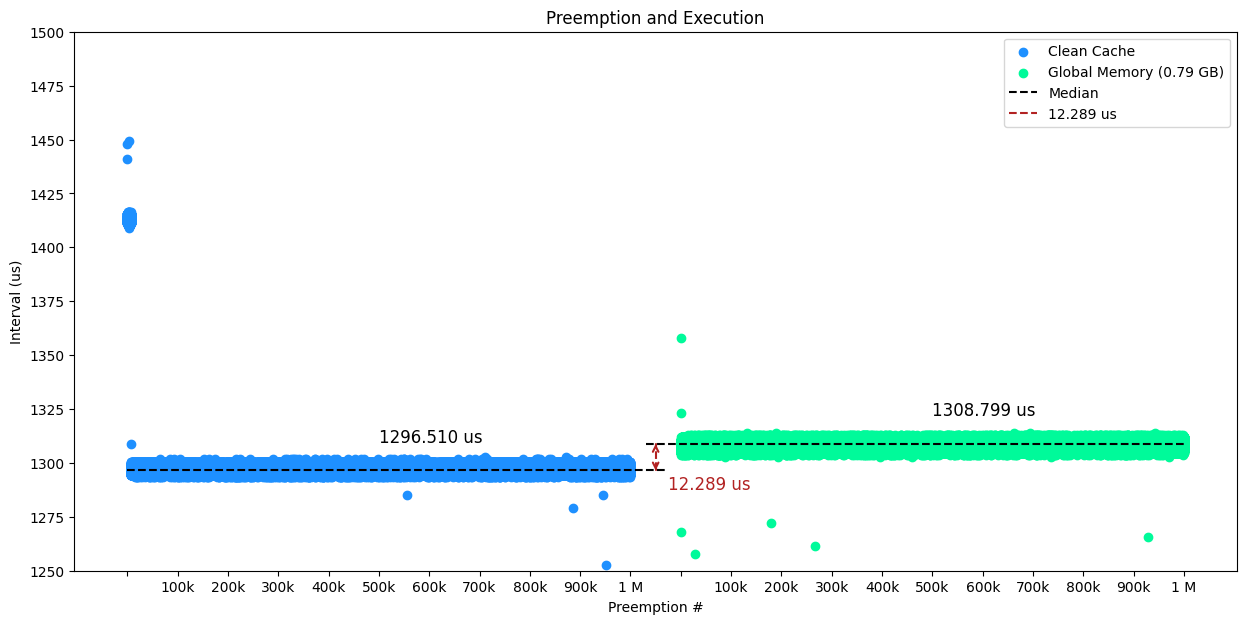

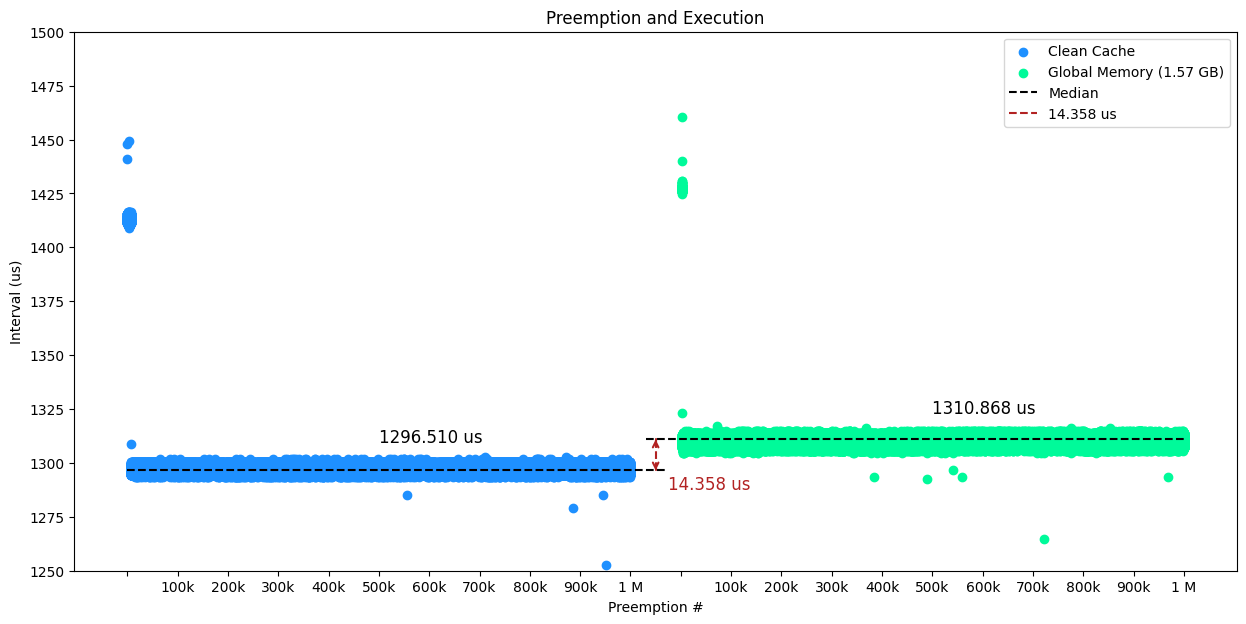

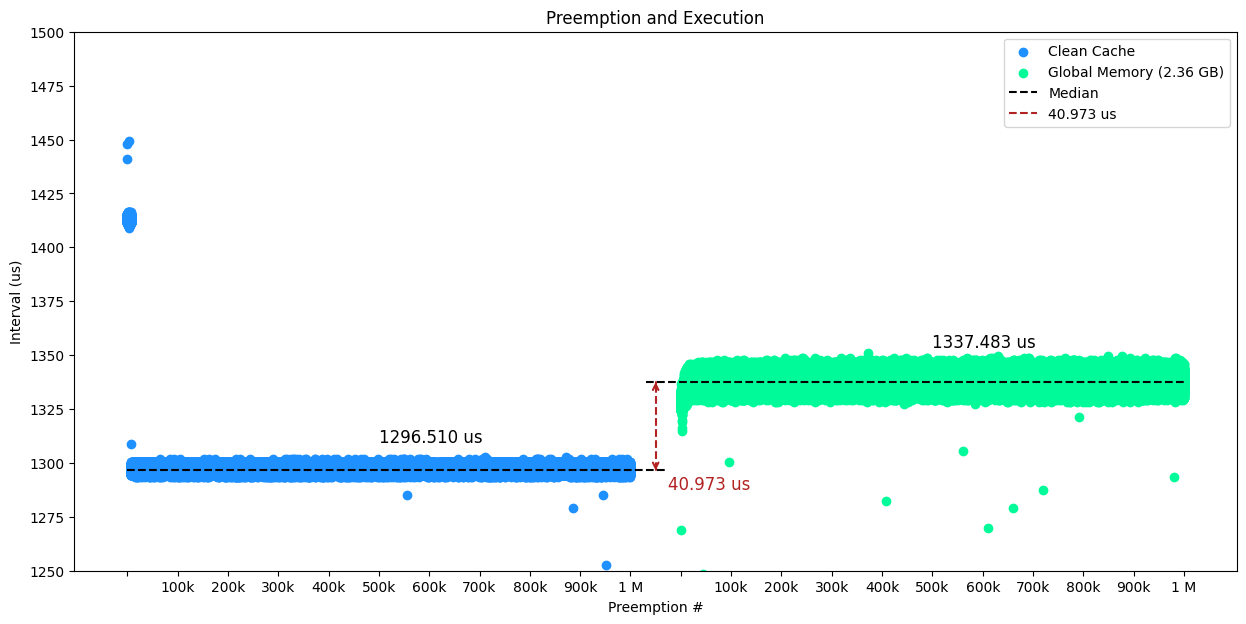

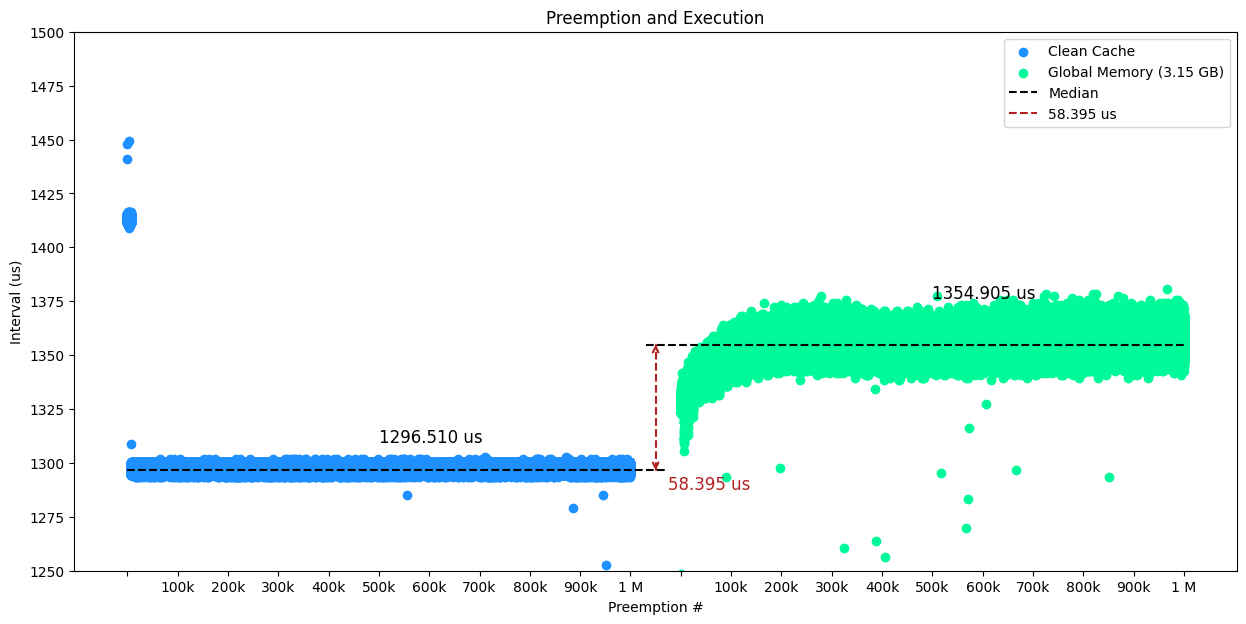

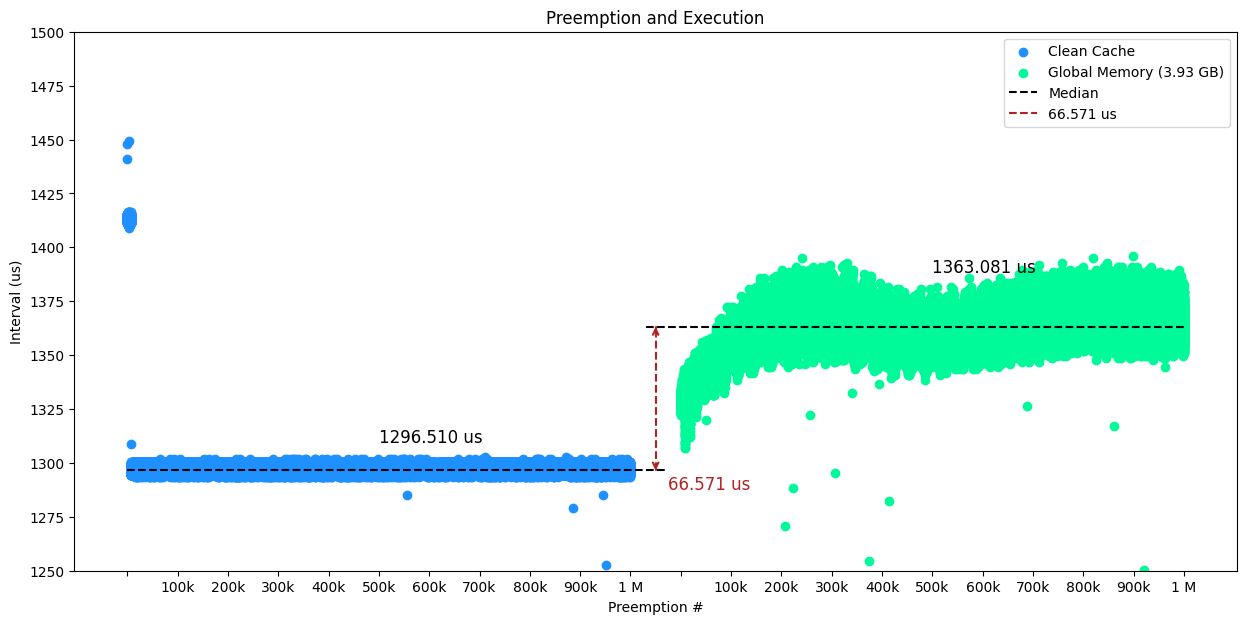

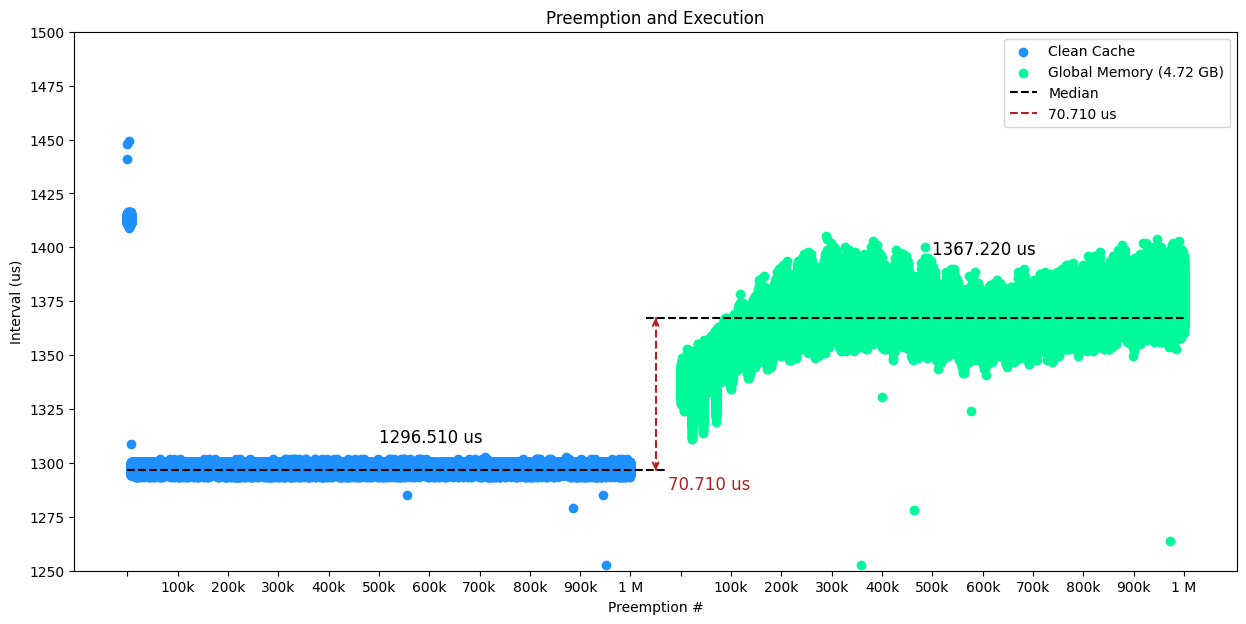

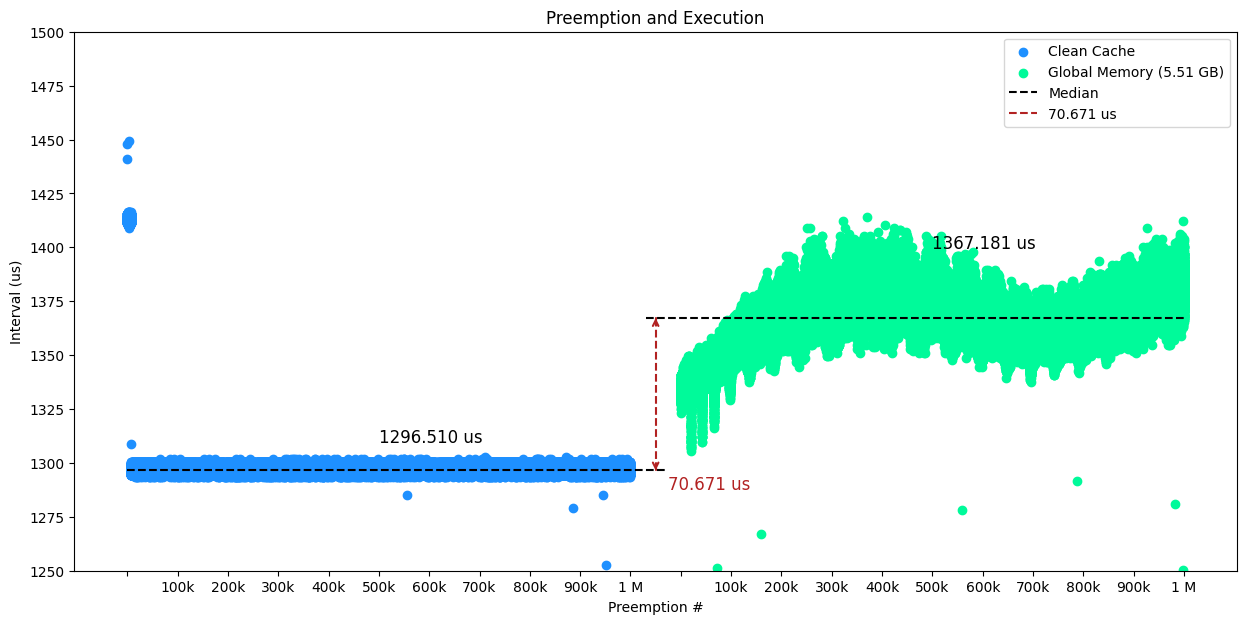

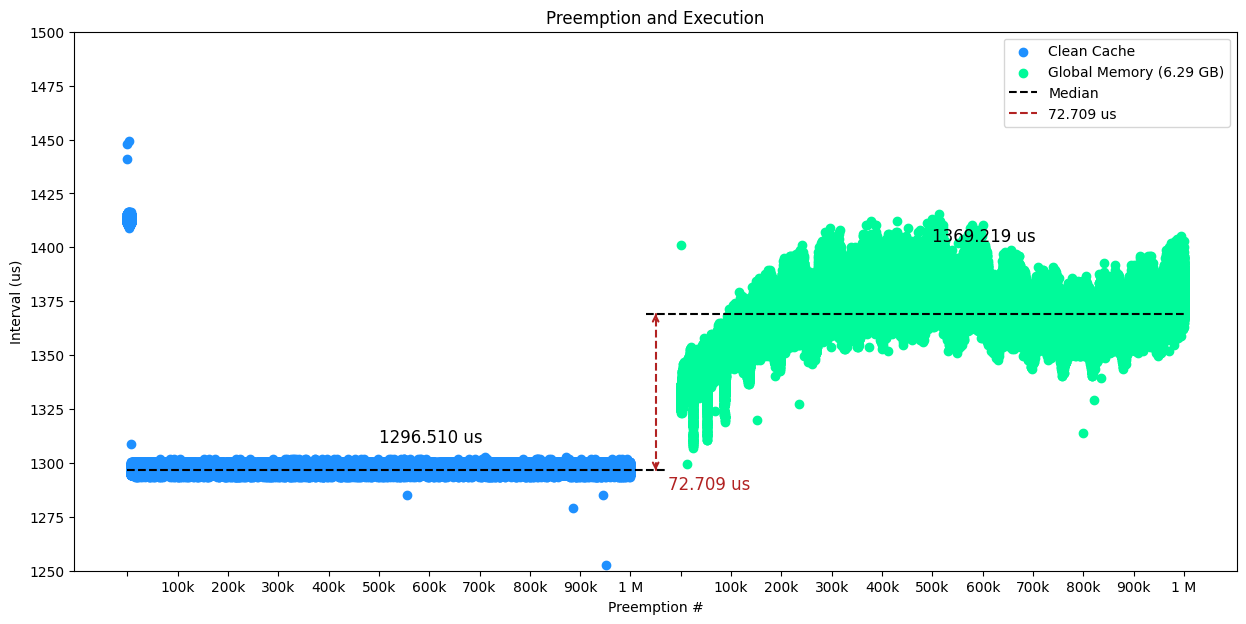

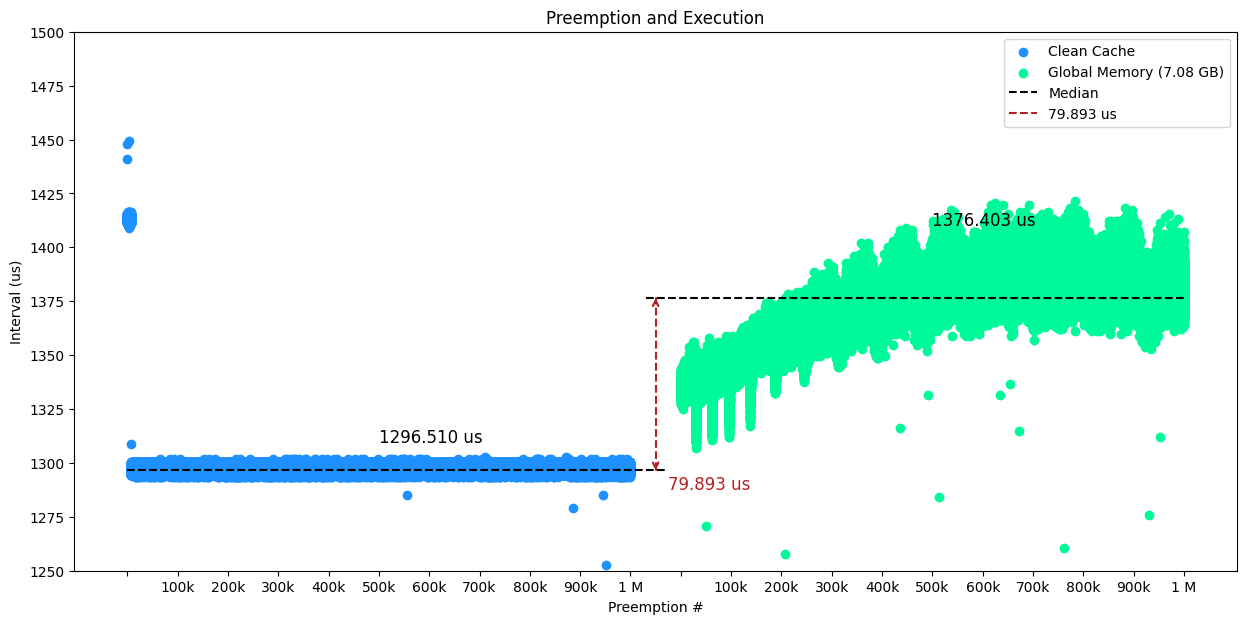

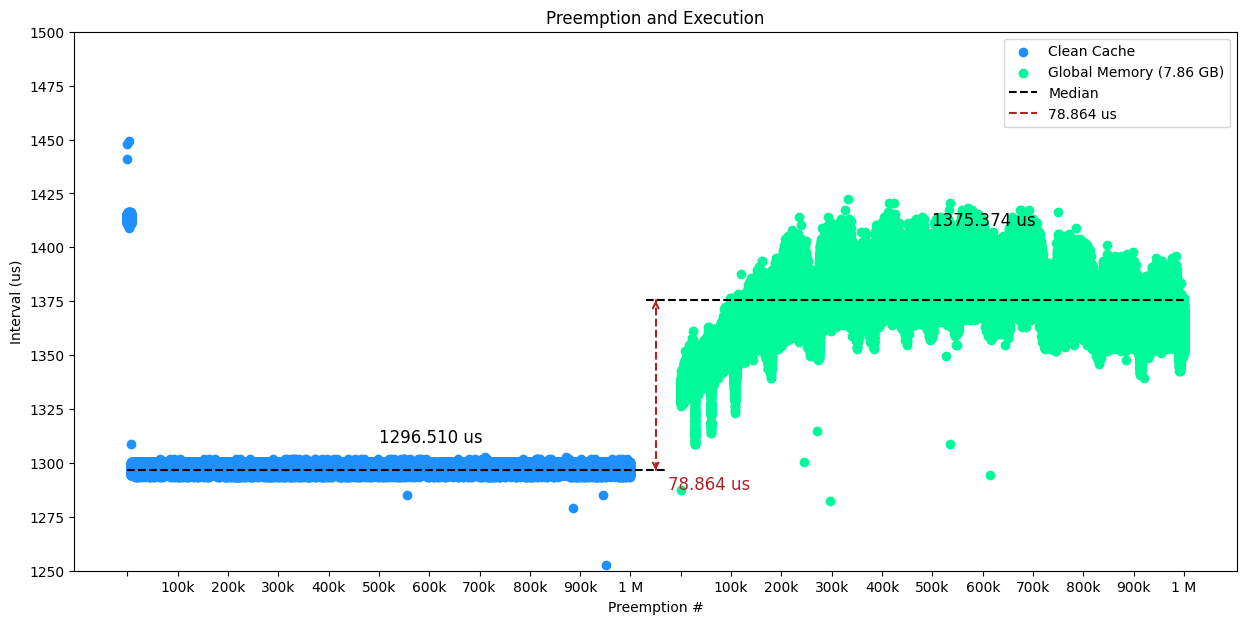

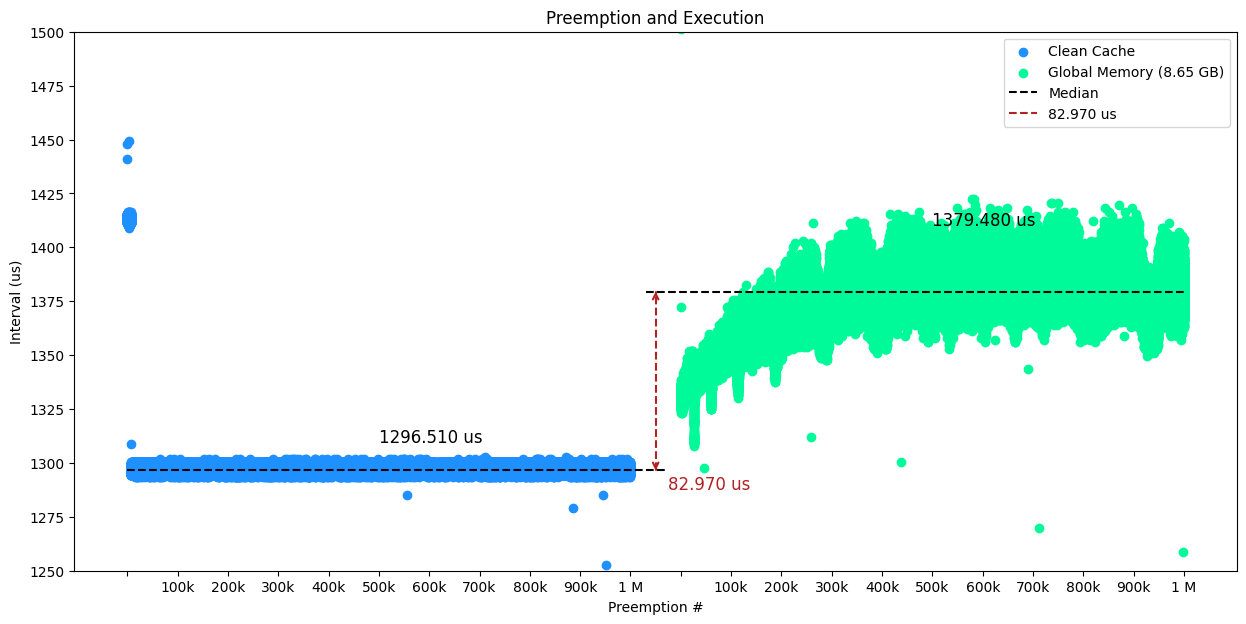

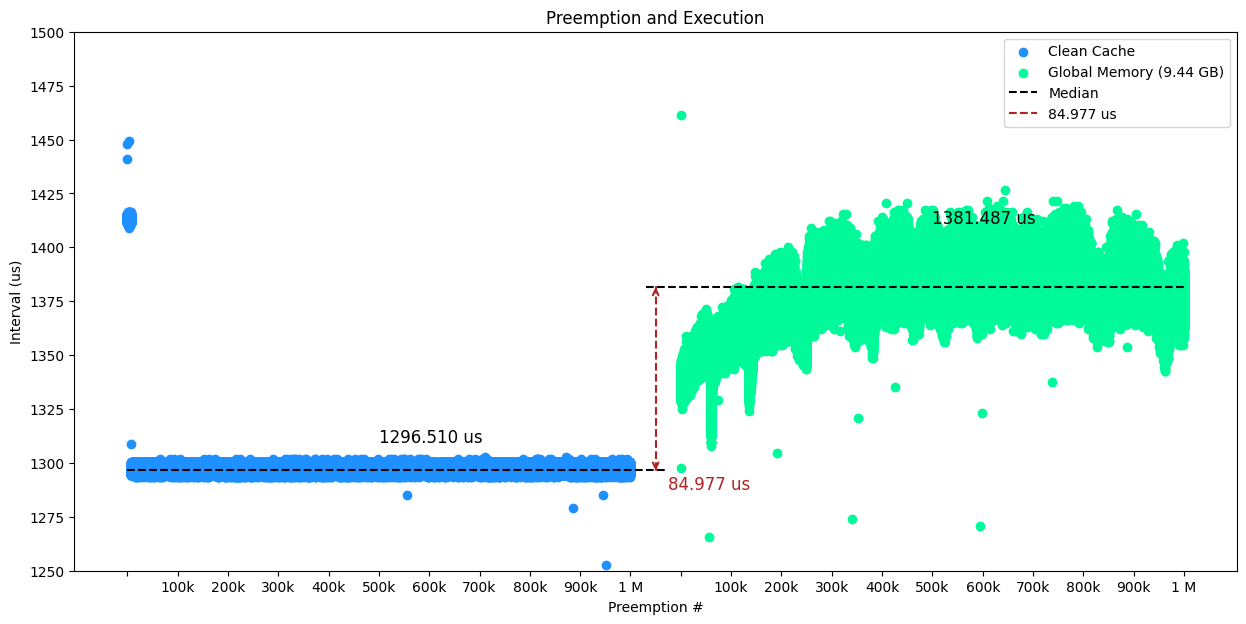

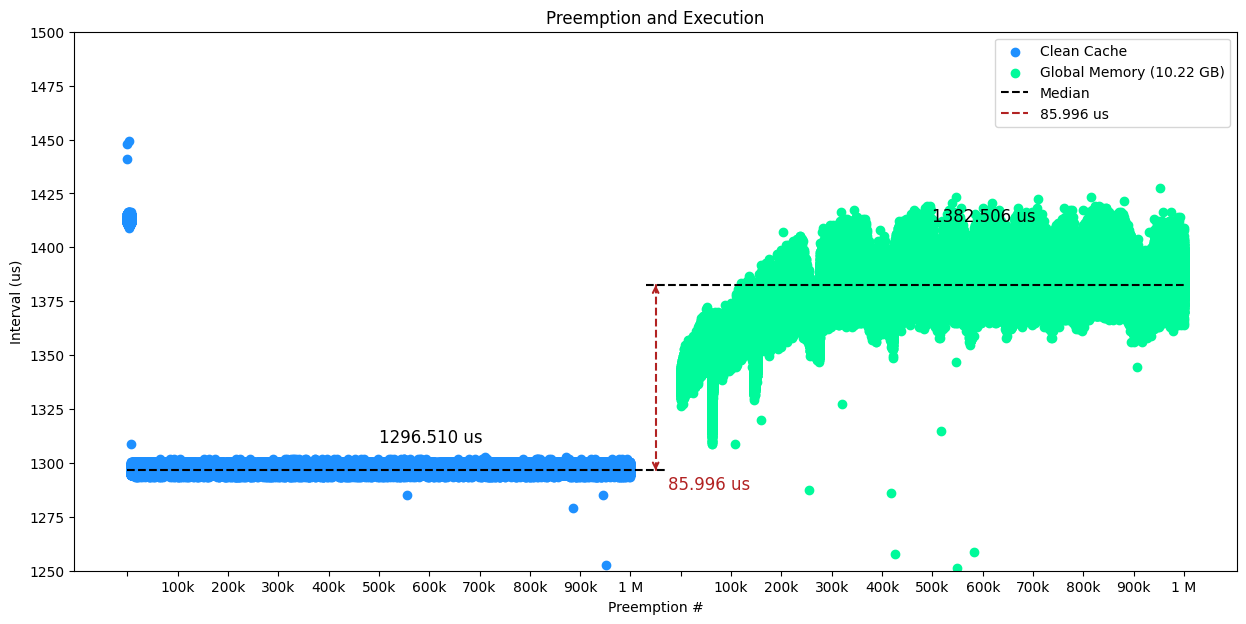

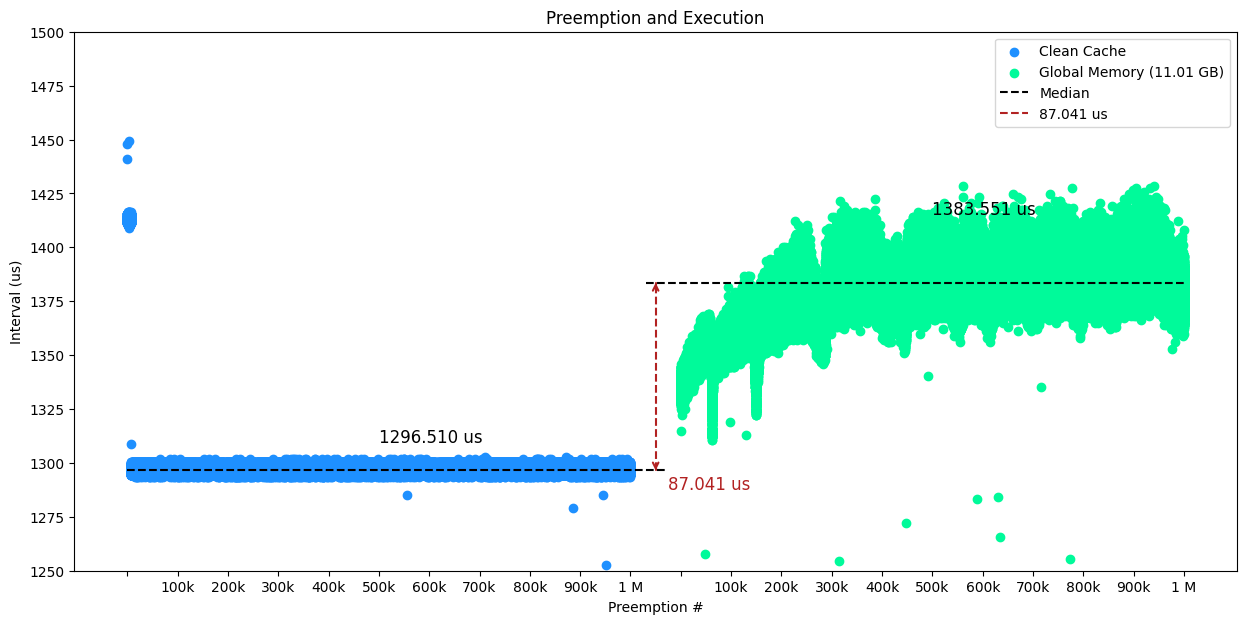

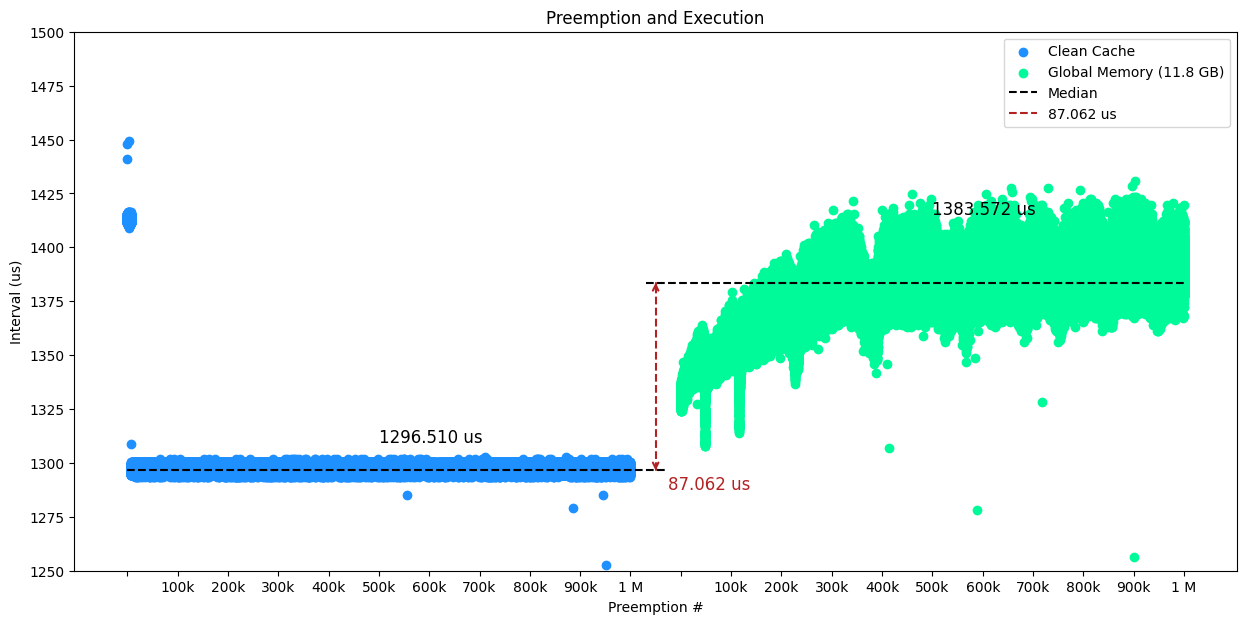

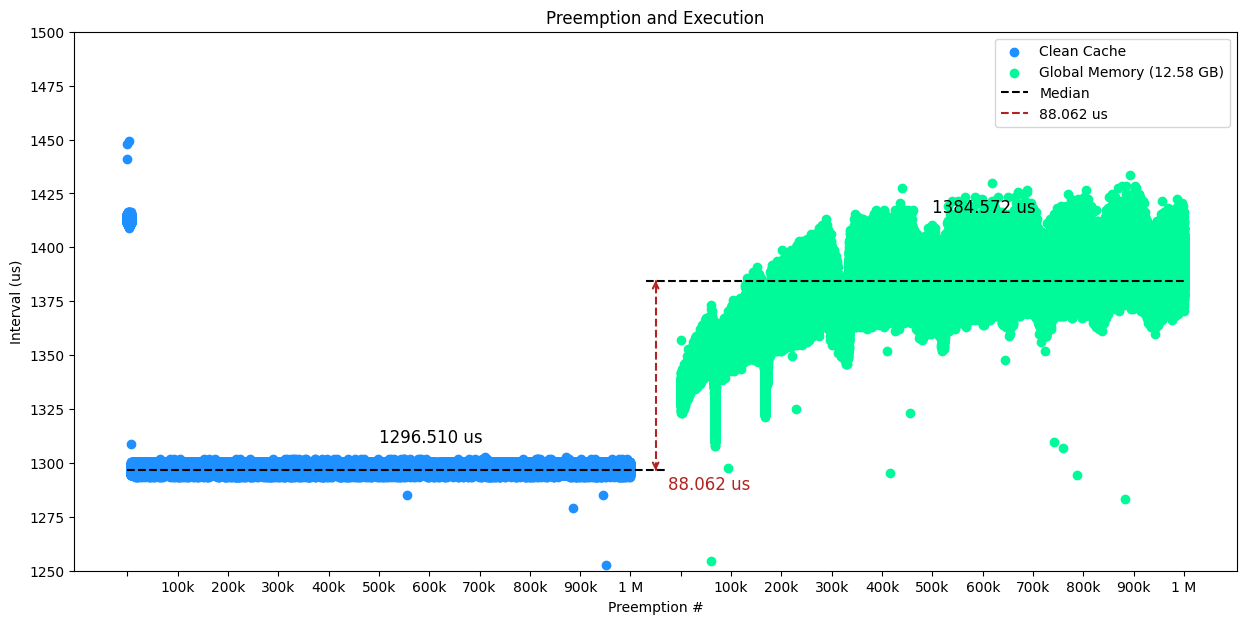

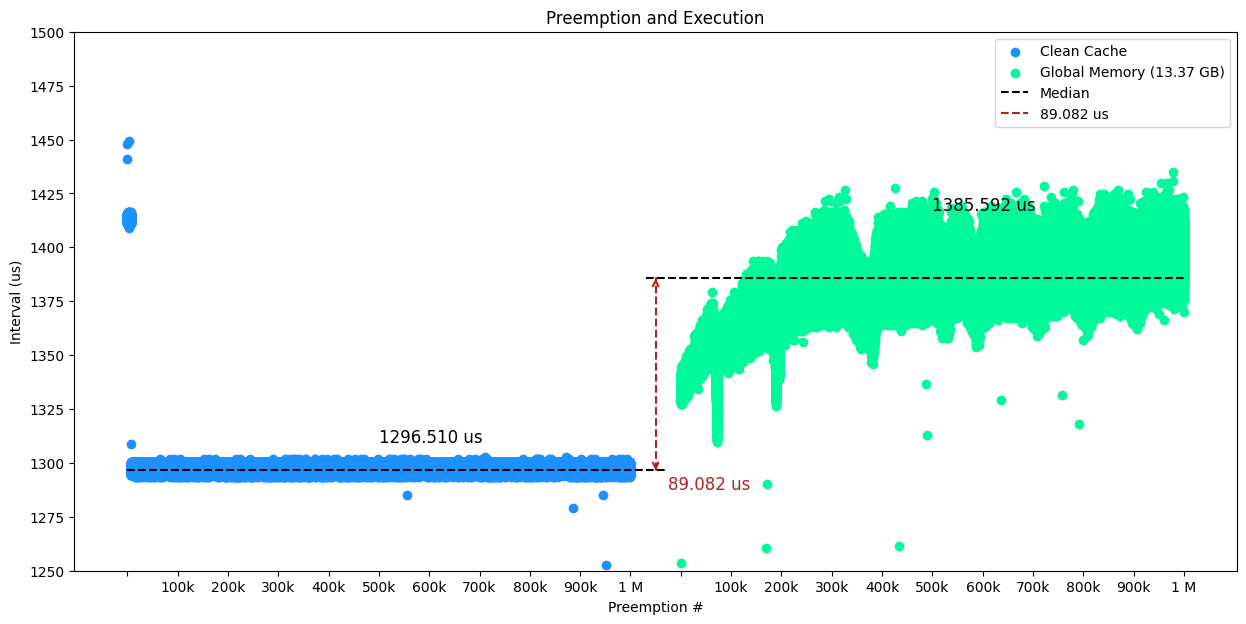

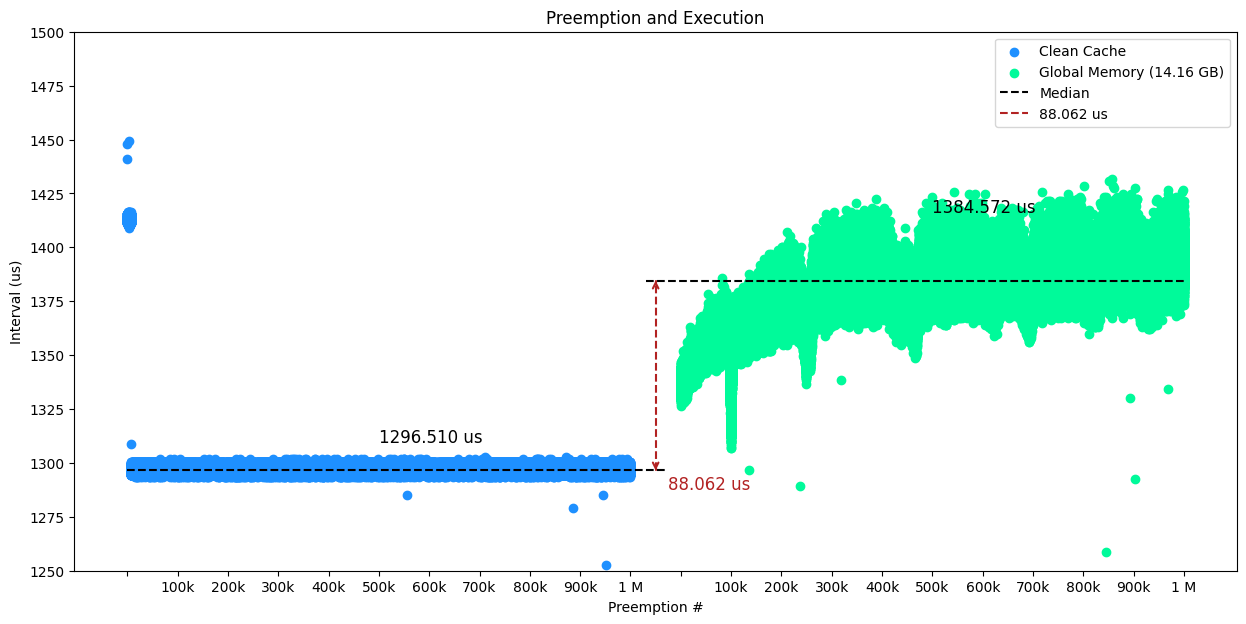

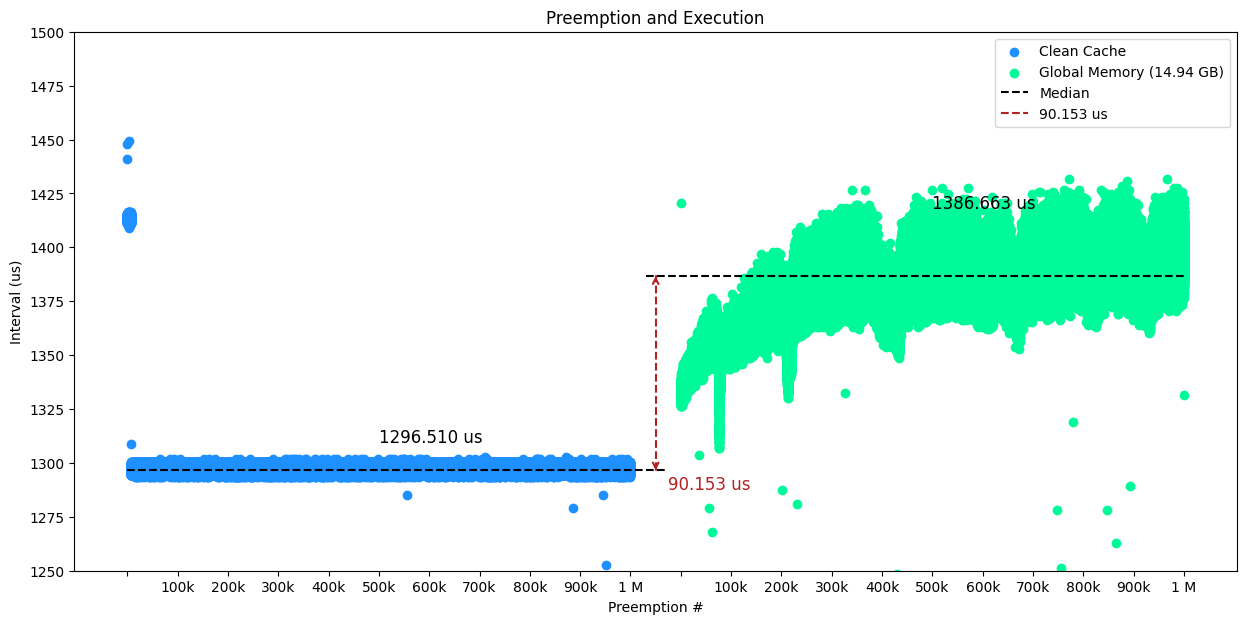

In [4]:
def plot_ivls(left_ivls, right_ivls, left_label, right_label=None, 
              right_label_list=None, dual=False,):
  NUM_SAMPLES = 1000000
  offset = NUM_SAMPLES // 10
  if right_label_list is None:
    right_label_list = [right_label for i in range(len(right_ivls))]
  if dual:
    for i, left, right in enumerate(zip(left_ivls, right_ivls)):
      plot_side_by_side(noSharedData=left, sharedData=right, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.5e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label_list[i])  
  else:
    for i, ivls in enumerate(right_ivls):
      plot_side_by_side(noSharedData=left_ivls, sharedData=ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.5e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label_list[i])

global_label_list = [f"Global Memory ({i} GB)" for i in gb_list]
plot_ivls(clean_ivls, global_ivls, left_label="Clean Cache", right_label_list=global_label_list)